<a href="https://colab.research.google.com/github/Pedro-Prestes/learning/blob/master/AVA_Doutorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **`Análise do CONSTRUTO _ Funcionalidade do Ambiente Virtual de Aprendizagem - Moodle`**

In [3]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
%matplotlib inline
!pip install bokeh

In [0]:
ava = pd.read_csv('/content/drive/My Drive/Pesquisa_Doutorado/Análise_doutorado/Escolas_participantes/Construtos em CSV/Construto_Geral_1ºMódulo.csv')

In [5]:
ava.head()

,Escolas,O Ambiente Virtual de Aprendizagem (AVA) apresenta ferramentas que estimulam o meu auto aprendizado.,A qualidade/velocidade da conexão de rede à internet influencia na minha aprendizagem.,O AVA possui ferramentas para discussão em grupos que favorece a feedback com meus colegas.,"Utilizar o AVA foi fácil e simples, não tive dificuldades.","As ferramentas disponíveis no AVA, como calendário, caixa de mensagens, chats, fóruns, questionários, entre outras, foram importantes para o meu aprendizado.",A interface do sistema foi amigável e de fácil manuseio.,"O material didático, disponível me ajudou a compreender o conteúdo.",A disposição do conteúdo didático no material do modulo foi de fácil compreensão e assimilação.,O material on-line foi adequado aos conteúdos programáticos do modulo.,O método de avaliação utilizado instiga minha participação na atividade.
0,Escola CA,4,4,4,3,4,3,4,4,4,4
1,Escola CA,4,4,4,4,4,4,4,4,4,4
2,Escola CA,4,3,4,3,4,3,4,3,4,4
3,Escola CA,3,3,4,2,3,3,3,3,3,4
4,Escola CA,4,4,4,3,4,4,4,3,4,4


In [6]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                         --------------  ----- 
 0   Escolas                                                                                                                                                        50 non-null     object
 1   O Ambiente Virtual de Aprendizagem (AVA) apresenta ferramentas que estimulam o meu auto aprendizado.                                                           50 non-null     int64 
 2   A qualidade/velocidade da conexão de rede à internet influencia na minha aprendizagem.                                                          

In [0]:
ava.rename({'O Ambiente Virtual de Aprendizagem (AVA) apresenta ferramentas que estimulam o meu auto aprendizado.':'Q001', 'A qualidade/velocidade da conexão de rede à internet influencia na minha aprendizagem.':'Q002', 'O AVA possui ferramentas para discussão em grupos que favorece a feedback com meus colegas.':'Q003', 'Utilizar o AVA foi fácil e simples, não tive dificuldades.':'Q004','As ferramentas disponíveis no AVA, como calendário, caixa de mensagens, chats, fóruns, questionários, entre outras, foram importantes para o meu aprendizado.':'Q005', 'A interface do sistema foi amigável e de fácil manuseio.':'Q006','O material didático, disponível me ajudou a compreender o conteúdo.':'Q007','A disposição do conteúdo didático no material do modulo foi de fácil compreensão e assimilação.':'Q008','O material on-line foi adequado aos conteúdos programáticos do modulo.':'Q009','O método de avaliação utilizado instiga minha participação na atividade.':'Q010'}, axis='columns', inplace=True)

In [8]:
ava.head()

,Escolas,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
0,Escola CA,4,4,4,3,4,3,4,4,4,4
1,Escola CA,4,4,4,4,4,4,4,4,4,4
2,Escola CA,4,3,4,3,4,3,4,3,4,4
3,Escola CA,3,3,4,2,3,3,3,3,3,4
4,Escola CA,4,4,4,3,4,4,4,3,4,4


In [0]:
ava = ava.set_index('Escolas')

In [10]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Escola CA to Escola RF
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    50 non-null     int64
 1   Q002    50 non-null     int64
 2   Q003    50 non-null     int64
 3   Q004    50 non-null     int64
 4   Q005    50 non-null     int64
 5   Q006    50 non-null     int64
 6   Q007    50 non-null     int64
 7   Q008    50 non-null     int64
 8   Q009    50 non-null     int64
 9   Q010    50 non-null     int64
dtypes: int64(10)
memory usage: 4.3+ KB


In [11]:
ava.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
Escolas,,,,,,,,,,
Escola CA,4,4,4,3,4,3,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4,4,4
Escola CA,4,3,4,3,4,3,4,3,4,4
Escola CA,3,3,4,2,3,3,3,3,3,4
Escola CA,4,4,4,3,4,4,4,3,4,4


In [12]:
ava.isnull()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
Escolas,,,,,,,,,,
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False


In [0]:
ava.dropna(inplace=True)

In [14]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Escola CA to Escola RF
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    50 non-null     int64
 1   Q002    50 non-null     int64
 2   Q003    50 non-null     int64
 3   Q004    50 non-null     int64
 4   Q005    50 non-null     int64
 5   Q006    50 non-null     int64
 6   Q007    50 non-null     int64
 7   Q008    50 non-null     int64
 8   Q009    50 non-null     int64
 9   Q010    50 non-null     int64
dtypes: int64(10)
memory usage: 4.3+ KB


In [16]:
ava.columns.values

array(['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008',
       'Q009', 'Q010'], dtype=object)

In [17]:
ava.duplicated()

Escolas
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP     True
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
dtype: bool

In [18]:
ava.drop_duplicates()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
Escolas,,,,,,,,,,
Escola CA,4,4,4,3,4,3,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4,4,4
Escola CA,4,3,4,3,4,3,4,3,4,4
Escola CA,3,3,4,2,3,3,3,3,3,4
Escola CA,4,4,4,3,4,4,4,3,4,4
Escola CA,4,4,4,4,4,4,4,4,3,4
Escola CA,4,4,4,3,4,3,4,4,3,3
Escola CA,4,3,4,4,4,3,4,4,4,4
Escola CA,3,4,4,3,3,3,3,3,3,3


In [19]:
ava.duplicated()

Escolas
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP     True
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
dtype: bool

In [20]:
ava.dtypes

Q001    int64
Q002    int64
Q003    int64
Q004    int64
Q005    int64
Q006    int64
Q007    int64
Q008    int64
Q009    int64
Q010    int64
dtype: object

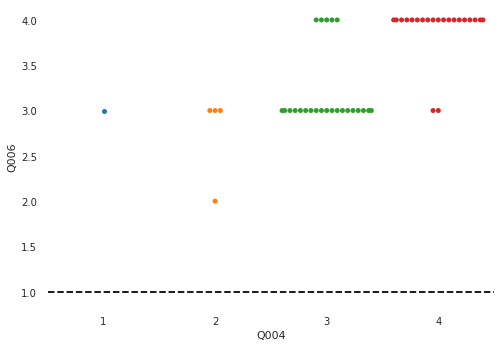

In [100]:
sns.swarmplot(data=ava, x='Q004', y='Q006')
plt.axhline(1.0, color='black', linestyle='--')

In [101]:
# 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
# Encontrada essa correlação entre as colunas Q004 e Q006 - "(0.696956) moderada para forte".
# Q004 - (Utilizar o AVA foi fácil e simples, não tive dificuldades).
# Q006 - (A interface do sistema foi amigável e de fácil manuseio).
#          ------As questões Q004 e Q006 tratam do manuseio do ambiente virtual de aprendizagem de forma amigável e intuitiva -------- 
# De posse dessas variáveis analisadas, também podemos destacar as "Q003" e "Q005" que apresentam uma correlação moderada, contudo tendenciando de - "(0.527999) moderada para fraca".
# Q003 - (O AVA possui ferramentas para discussão em grupos que favorece a feedback com meus colegas).
# Q005 - (As ferramentas disponíveis no AVA, como calendário, caixa de mensagens, chats, fóruns, questionários, entre outras, foram importantes para o meu aprendizado).
#         -------As questões Q003 e Q005 tratam do feedback entre os participantes, porém apesar do tema tratar sobre interação o que se observa é a "moderada para fraca correlação" no sentido de colaborar com o aprendizado --------
# As demais variáveis segundo a correlação de Pearson demonstraram fraca correlação conforme a célula em questão.
ava.corr('pearson')

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
Q001,1.000000,0.329634,0.396621,0.276657,0.213189,0.363683,0.062403,0.346257,0.337711,0.193512
Q002,0.329634,1.000000,0.212544,0.348214,0.381685,0.288625,-0.367484,0.045554,0.189310,0.159586
Q003,0.396621,0.212544,1.000000,0.255259,0.527999,0.130942,0.005135,0.341033,0.261880,0.286464
Q004,0.276657,0.348214,0.255259,1.000000,0.460445,0.696956,-0.050907,0.293998,0.203628,-0.071651
Q005,0.213189,0.381685,0.527999,0.460445,1.000000,0.199006,0.154903,0.287290,0.438264,0.375139
Q006,0.363683,0.288625,0.130942,0.696956,0.199006,1.000000,-0.046449,0.108578,0.119440,-0.086602
Q007,0.062403,-0.367484,0.005135,-0.050907,0.154903,-0.046449,1.000000,0.336123,0.305556,0.138109
Q008,0.346257,0.045554,0.341033,0.293998,0.287290,0.108578,0.336123,1.000000,0.527102,0.375344
Q009,0.337711,0.189310,0.261880,0.203628,0.438264,0.119440,0.305556,0.527102,1.000000,0.544311
Q010,0.193512,0.159586,0.286464,-0.071651,0.375139,-0.086602,0.138109,0.375344,0.544311,1.000000


In [0]:
# Calcule a correlação  
correlacoes = ava.corr()

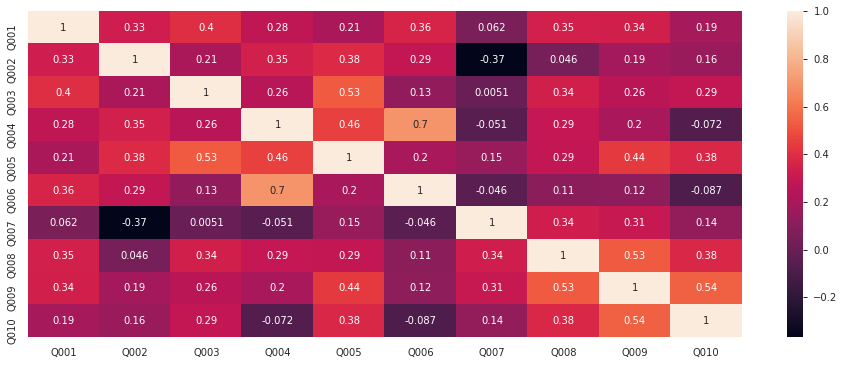

In [103]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

In [104]:
# Apenas uma amostragem por acionamento mecânico, contudo vale apena automatizar como demonstrado acima.
ava['Q004'].corr(ava['Q006'])

0.6969564205487533

In [0]:
X = ava.drop(['Q004'], axis=1)
y = ava['Q004']

In [136]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
print(features)

[[4 4 4 3]
 [4 4 4 4]
 [3 4 4 3]
 [3 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 3]
 [4 4 4 4]
 [3 4 4 3]
 [4 4 4 4]
 [4 4 3 3]
 [4 3 4 4]
 [4 4 3 4]
 [1 3 2 3]
 [3 4 4 3]
 [4 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [4 4 4 4]
 [3 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [3 4 4 3]
 [4 4 4 4]
 [3 4 4 3]
 [3 3 4 3]
 [4 3 3 3]
 [4 4 4 4]
 [3 4 3 3]
 [3 4 4 4]
 [3 3 3 4]
 [2 4 3 4]
 [3 4 4 4]
 [4 4 4 4]
 [4 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [3 3 3 4]
 [4 3 3 2]
 [4 4 4 4]
 [4 4 4 3]
 [4 4 4 3]]


In [137]:
cols = fit.get_support(indices=True)
ava.iloc[:,cols]

,Q002,Q003,Q004,Q005
Escolas,,,,
Escola CA,4,4,3,4
Escola CA,4,4,4,4
Escola CA,3,4,3,4
Escola CA,3,4,2,3
Escola CA,4,4,3,4
Escola CA,4,4,4,4
Escola CA,4,4,3,4
Escola CA,4,4,4,4
Escola CA,3,4,4,4


In [0]:
#features categóricas ou variável alvo categórica
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
# feature extraction
test = SelectKBest(chi2, k=4)

In [0]:
fit = test.fit(X, y)

In [141]:

fit.get_support(indices=True)

array([1, 3, 4, 8])

In [0]:
features = fit.transform(X)

In [143]:
# Visualizando as features:
print(features)

[[4 4 3 4]
 [4 4 4 4]
 [3 4 3 4]
 [3 3 3 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 3 3]
 [4 4 4 4]
 [3 4 3 4]
 [4 4 4 4]
 [4 3 3 3]
 [4 4 4 3]
 [4 3 4 3]
 [1 2 3 3]
 [3 4 3 4]
 [4 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [4 4 4 3]
 [3 4 4 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [3 4 3 3]
 [4 4 4 4]
 [3 4 3 4]
 [3 4 3 3]
 [4 3 3 4]
 [4 4 4 4]
 [3 3 3 4]
 [3 4 4 4]
 [3 3 4 4]
 [2 3 4 3]
 [3 4 4 4]
 [4 4 4 4]
 [4 3 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [3 3 4 3]
 [4 3 2 4]
 [4 4 4 3]
 [4 4 3 4]
 [4 4 3 4]]


In [144]:
cols = fit.get_support(indices=True)
ava.iloc[:, cols]

,Q002,Q004,Q005,Q009
Escolas,,,,
Escola CA,4,3,4,4
Escola CA,4,4,4,4
Escola CA,3,3,4,4
Escola CA,3,2,3,3
Escola CA,4,3,4,4
Escola CA,4,4,4,3
Escola CA,4,3,4,3
Escola CA,4,4,4,4
Escola CA,3,4,4,4


In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
from sklearn.feature_selection import RFE
rfe = RFE(model, 4)
fit = rfe.fit(X, y)

In [146]:
# Mostrando o número de features:
print ("Número de features: {}".format(fit.n_features_))  

Número de features: 4


In [147]:
# Visualizando os índices:
cols = fit.get_support(indices=True)
ava.iloc[:,cols]

,Q002,Q004,Q005,Q009
Escolas,,,,
Escola CA,4,3,4,4
Escola CA,4,4,4,4
Escola CA,3,3,4,4
Escola CA,3,2,3,3
Escola CA,4,3,4,4
Escola CA,4,4,4,3
Escola CA,4,3,4,3
Escola CA,4,4,4,4
Escola CA,3,4,4,4


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [150]:
# Score de cada um dos atributos:
print(model.feature_importances_)

[0.07952649 0.14460298 0.02680375 0.06381549 0.36238789 0.07854522
 0.12803473 0.03502962 0.08125384]


In [151]:
# Nome das colunas:
ava

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
Escolas,,,,,,,,,,
Escola CA,4,4,4,3,4,3,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4,4,4
Escola CA,4,3,4,3,4,3,4,3,4,4
Escola CA,3,3,4,2,3,3,3,3,3,4
Escola CA,4,4,4,3,4,4,4,3,4,4
Escola CA,4,4,4,4,4,4,4,4,3,4
Escola CA,4,4,4,3,4,3,4,4,3,3
Escola CA,4,4,4,4,4,4,4,4,4,4
Escola CA,4,3,4,4,4,3,4,4,4,4


In [152]:
# Criando um Dataframe com as colunas e seus scores:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Q006,0.362388
Q002,0.144603
Q008,0.128035
Q010,0.081254
Q001,0.079526
Q007,0.078545
Q005,0.063815
Q009,0.035030
Q003,0.026804


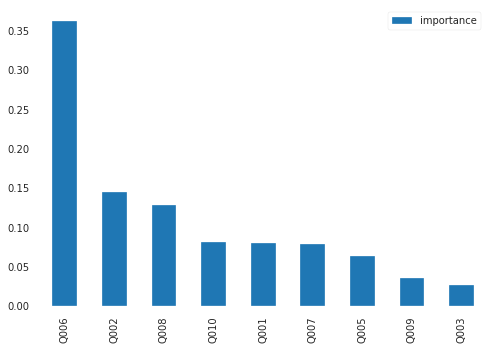

In [153]:
# Visualizando as importâncias de forma gráfica:
feature_importances.plot(kind='bar')

In [154]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', RFE(LogisticRegression(max_iter=2000),4)),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('feature_selection',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=2000,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=4, step=1, verbose=0)),
                ('classi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        cl

In [155]:
clf.steps

[('feature_selection',
  RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=2000,
                                   multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='lbfgs', tol=0.0001,
                                   verbose=0, warm_start=False),
      n_features_to_select=4, step=1, verbose=0)),
 ('classification',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_j

In [156]:
ava.describe()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.620000,3.480000,3.86000,3.300000,3.760000,3.460000,3.720000,3.680000,3.720000,3.740000
std,0.490314,0.646498,0.35051,0.707107,0.476381,0.542481,0.453557,0.471212,0.453557,0.443087
min,3.000000,1.000000,3.00000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
25%,3.000000,3.000000,4.00000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.250000
50%,4.000000,4.000000,4.00000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [0]:
# Árvore de decisão será o próximo passo de nossa análise, 
# contudo vale apena deixar claro que esta técnica está propência
# a embaralhar os resultados dos testes em relação ao resultado de treinos permitindo o overfitting, e também é um pouco instável.

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(ava.drop('Q004',axis=1),ava['Q004'],test_size=0.3)

In [158]:
# Verificando as formas dos dados:
X_train.shape,X_test.shape

((35, 9), (15, 9))

In [0]:
# Instânciando o objeto classificador:
clf = DecisionTreeClassifier()

In [0]:
# Treinando o modelo de arvore de decisão:
clf = clf.fit(X_train,y_train)

In [161]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

array([0.01037344, 0.07824541, 0.08852006, 0.17315072, 0.36034069,
       0.05658242, 0.13843833, 0.        , 0.09434894])

In [162]:
for feature, importances_ in zip(ava.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importances_))

# Confirmando a melhor correlação (Q006) para (Q004).
# Saída:

Q001:0.010373443983402494
Q002:0.07824540604623595
Q003:0.08852005532503461
Q004:0.173150719121455
Q005:0.36034068573924444
Q006:0.05658242172764995
Q007:0.13843832516031687
Q008:0.0
Q009:0.09434894289666075


In [163]:
resultado = clf.predict(X_test)
resultado
# O código acima nos da a seguinte saída:

array([4, 3, 3, 3, 2, 3, 3, 4, 4, 4, 4, 3, 4, 3, 3])

In [164]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

# Resultado do classification_report:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.50      0.67      0.57         6
           4       0.83      0.71      0.77         7

    accuracy                           0.60        15
   macro avg       0.44      0.46      0.45        15
weighted avg       0.59      0.60      0.59        15



In [165]:
# Renderizando a árvore de forma gráfica:
!pip3 install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot

In [0]:
import pydot
import graphviz

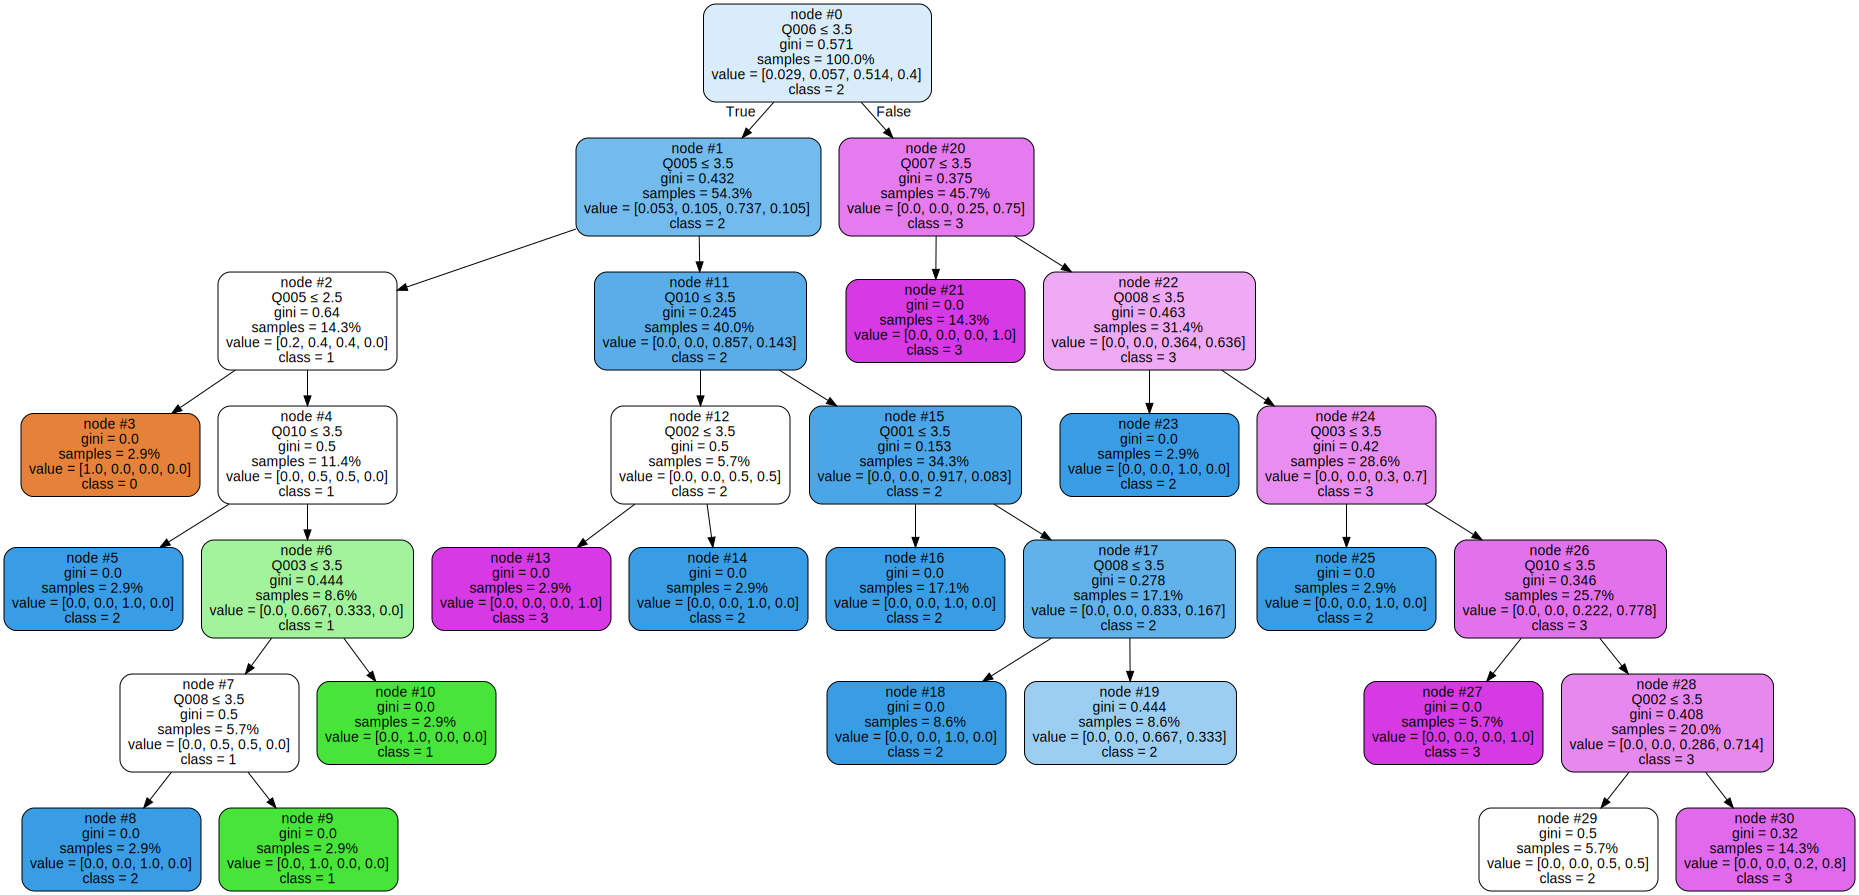

In [167]:
dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=ava.drop('Q004',axis=1).columns,
         class_names=['0','1', '2','3','4'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [170]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature matrix
X,y = ava.drop('Q004',axis=1),ava['Q004']

# feature labels
features_label = ava.drop('Q004',axis=1).columns

# class label
class_label = ['0','1', '2','3','4']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


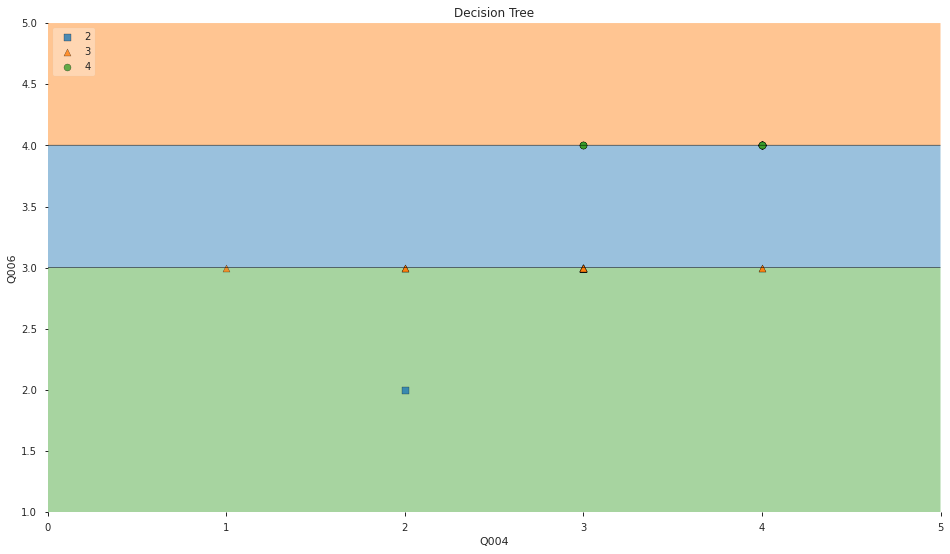

In [171]:
# Visualizando as fronteiras criadas pela arvore:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def visualize_fronteiras(msamples_split,max_depth):
    X = ava[['Q004','Q006']].values
    y = ava.Q006.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(16,9))
    plot_decision_regions(X, y, clf=tree, legend=2)

    plt.xlabel('Q004')
    plt.ylabel('Q006')
    plt.title('Decision Tree')
    plt.show()

# Chamando a função criada anteriormente:

visualize_fronteiras(10,max_depth=8)

In [172]:
# Navegando na estrutura da arvore de decisão:
estimator = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X, y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

Número de nós: 13


In [174]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 ava.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 13 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo Q005 <= 3.5 
 se não, vai para o nó 8.
	nó=1 (nó teste): vai para o nó 2 se o valor do atributo Q004 <= 3.5 
 se não, vai para o nó 5.
		nó=2 (nó teste): vai para o nó 3 se o valor do atributo Q006 <= 3.5 
 se não, vai para o nó 4.
			nó=3 (nó folha).
			nó=4 (nó folha).
		nó=5 (nó teste): vai para o nó 6 se o valor do atributo Q001 <= 3.5 
 se não, vai para o nó 7.
			nó=6 (nó folha).
			nó=7 (nó folha).
	nó=8 (nó teste): vai para o nó 9 se o valor do atributo Q006 <= 3.5 
 se não, vai para o nó 10.
		nó=9 (nó folha).
		nó=10 (nó teste): vai para o nó 11 se o valor do atributo Q009 <= 3.5 
 se não, vai para o nó 12.
			nó=11 (nó folha).
			nó=12 (nó folha).


In [0]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X)

    leave_id = estimator.apply(X)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nFeatures usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(ava.columns,X.iloc[sample_id].values):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 ava.columns[feature[node_id]],
                 X.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
        
    pred =estimator.predict(X.iloc[sample_id].values.reshape(1, -1))
    print(pred) 
    print("\tClasse => %s" %pred)

In [176]:
extrai_regras(2)


Features usadas para predizer a amostra 2
Q001 = 4
Q002 = 3
Q003 = 4
Q004 = 4
Q005 = 3
Q006 = 4
Q007 = 3
Q008 = 4
Q009 = 4


id do nó de decisão 0 : (atributo Q005 com valor = 3 <= 3.5)
id do nó de decisão 1 : (atributo Q004 com valor = 4 > 3.5)
id do nó de decisão 5 : (atributo Q001 com valor = 4 > 3.5)
[3]
	Classe => [3]


In [177]:
extrai_regras(7)


Features usadas para predizer a amostra 7
Q001 = 4
Q002 = 4
Q003 = 4
Q004 = 4
Q005 = 4
Q006 = 4
Q007 = 4
Q008 = 4
Q009 = 4


id do nó de decisão 0 : (atributo Q005 com valor = 4 > 3.5)
id do nó de decisão 8 : (atributo Q006 com valor = 4 > 3.5)
id do nó de decisão 10 : (atributo Q009 com valor = 4 > 3.5)
[4]
	Classe => [4]


In [178]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=30896f464213db6a3b695ffb3e16df5c639521504288b88f805c6410bdb6fa56
  Stored in directory: /tmp/pip-ephem-wheel-cache-kvoa2ff1/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [0]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [0]:
# executando o profile
profile = ProfileReport(ava, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [181]:
profile

In [182]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio01.html")

In [0]:
#Interpretando o valor de ρ

    #0.9 a 1 positivo ou negativo indica uma correlação muito forte.
    #0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    #0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    #0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    #0 a 0.3 positivo ou negativo indica uma correlação desprezível.